 ## Домашнее задание Проверка гипотез

<div class="alert alert-info">
<b>Задание № 1</b>
    
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.
</div>

In [ ]:
import math
import numpy as np
from scipy import stats

In [ ]:
def check_normality(data):
    #H0 - Данные распределены нормально
    #H1 - Данные распределены не нормально
    #Уровень значимости alpha=0,05
    stat, p = stats.shapiro(data)
    if p < 0.05:
        print("Отклоняем нулевую гипотезу >> Данные распределены не нормально")
    else:
        print("Не отклоняем нулевую гипотезу >> Данные распределены нормально")

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
- Является ли результат полезным с практической точки зрения? Почему да или нет?
</div>

In [ ]:
np.random.seed(42) #фиксация случайности
men  = stats.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
women = stats.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

In [ ]:
#H0 - Средние выборок равны (различий между выборками нет)
#H1 - Средние выборок не равны (есть различия между выборками)
stat, p_val = stats.ttest_ind(a=men, b=women)
print(f"Статистика = {stat:.5f}, p_val = {p_val:.5f}")

Статистика = 28.31364, p_val = 0.00000


In [ ]:
if p_val > 0.001:
    print("Не отклоняем нулевую гипотезу, средние выборок равны (различий между выборками нет)")
else:
    print("Отклоняем нулевую гипотезу, средние выборок не равны (есть различия между выборками)")

Отклоняем нулевую гипотезу, средние выборок не равны (есть различия между выборками)



**Вывод:**

Низкое значение p-value (фактически нулевое значение) говорит о том, что средние двух выборок сильно похожи.

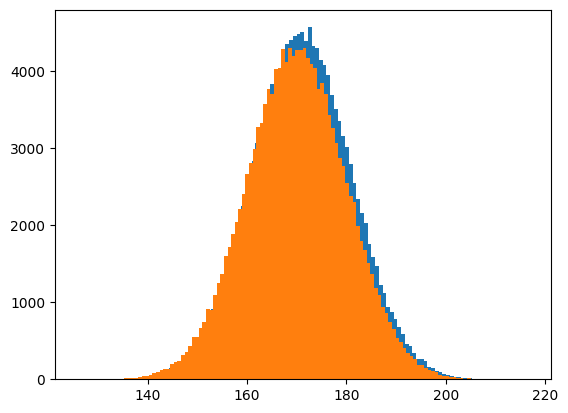

In [ ]:
import matplotlib.pyplot as plt

plt.hist(men, bins=120);
plt.hist(women, bins=120);

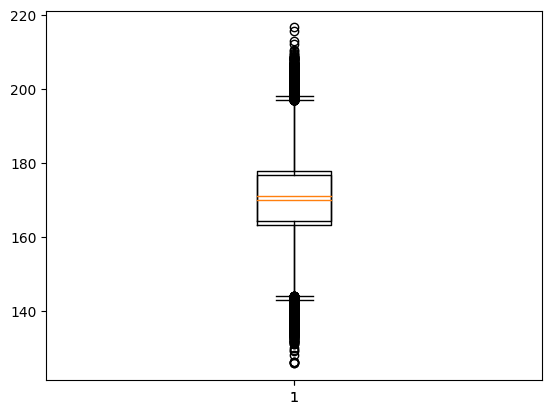

In [ ]:
plt.boxplot(men);
plt.boxplot(women);

**Вывод:**
Графически также подтверждается сильное сходство средних двух выборок.

С практической точки зрения результат не является полезным, поскольку выборки фактически одинаковы, то есть исследовать выборку men практически то же самое, что исследовать выборку women.

<div class="alert alert-info">
<b>Задание № 3</b>

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.
</div>

In [ ]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

In [ ]:
check_normality(test_team)
check_normality(developer_team)

Отклоняем нулевую гипотезу >> Данные распределены не нормально
Отклоняем нулевую гипотезу >> Данные распределены не нормально


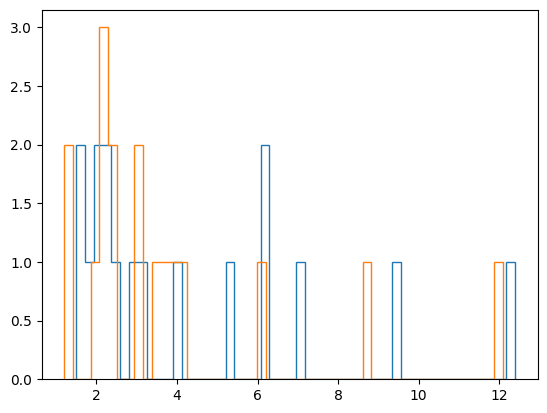

In [ ]:
plt.hist(test_team, histtype = 'step', bins=50);
plt.hist(developer_team, histtype = 'step', bins=50);

**Вывод:**

Данные в представленных выборках распределены не нормально.

In [ ]:
#H0 - Распределения выборок одинаковы
#H1 - Распределения выборок различаются

stat, p = stats.mannwhitneyu(test_team, developer_team)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 151.50000, p = 0.82265
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


**Вывод:**

Разница в переутомлении двух команд, вероятно, отсутствует.

<div class="alert alert-info">
<b>Задание № 4</b>

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.
</div>

In [ ]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];

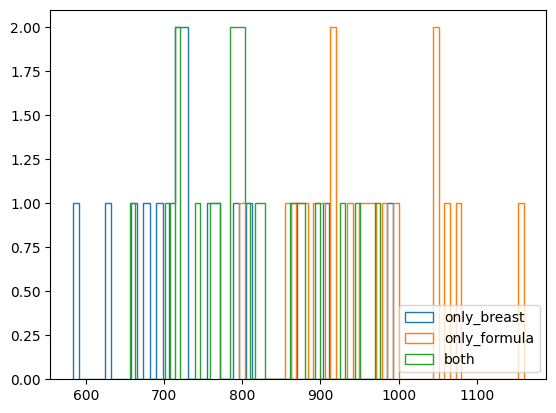

In [ ]:
plt.hist(only_breast, histtype = 'step', bins=50);
plt.hist(only_formula, histtype = 'step', bins=50);
plt.hist(both, histtype = 'step', bins=50);
plt.legend(('only_breast', 'only_formula', 'both'))

#Исходя из графика видно, что разница в приросте наиболее заметна между 1-ой (грудное вскармливание) и 2-ой группой (кормление смесью)

In [ ]:
#H0 - Среднемесячный прирост веса по трем группам не различается
#H1 - Среднемесячный прирост веса по трем группам различается

stat, p = stats.f_oneway(only_breast, only_formula, both)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, среднемесячный прирост веса по трем группам не различается')
else:
    print('Отклоняем нулевую гипотезу, среднемесячный прирост веса по трем группам различается')


Статистика = 26.70125, p = 0.00000
Отклоняем нулевую гипотезу, среднемесячный прирост веса по трем группам различается


Дисперсионный анализ средних в выборках (ANOVA) показал, что, как мнимум, у одной выборки среднее отличается от остальных.

In [ ]:
from scipy.stats import tukey_hsd

res = tukey_hsd(only_breast, only_formula, both)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)   -209.392     0.000  -281.434  -137.351
 (0 - 2)    -60.129     0.100  -129.149     8.891
 (1 - 0)    209.392     0.000   137.351   281.434
 (1 - 2)    149.264     0.000    82.365   216.162
 (2 - 0)     60.129     0.100    -8.891   129.149
 (2 - 1)   -149.264     0.000  -216.162   -82.365



**Вывод:**

Статистически значимая разница в приросте имеется между группами 1 и 2, 2 и 3.
Вместе с тем существенных различий в приросте веса между группами 1 и 3 не наблюдается (здесь статистически знчимая разница отсутствует).

<div class="alert alert-info">
<b>Задание № 5 (Опционально) </b>

Аналитик финансовой инвестиционной компании интересуется взаимосвязью между полом и склонностью к риску. Из базы данных была взята случайная выборка из 660 клиентов. Клиенты в выборке были классифицированы в соответствии с их полом и склонностью к риску. Результат приведен в следующей таблице.
    
Проверьте гипотезу о том, что склонность к риску клиентов этой компании не зависит от их пола. Используйте α = 0.01.    
</div>

In [ ]:
import pandas as pd

contingency_table = pd.DataFrame(
    [
        [53, 23, 30, 36, 88],
        [71, 48, 51, 57, 203]
    ],
    #columns = ['Machine Learning', 'Data Science', 'Analytics'],
    index = ['Ж', 'М'])

print('Уровень риска')
print(contingency_table)

Уровень риска
    0   1   2   3    4
Ж  53  23  30  36   88
М  71  48  51  57  203


In [ ]:
#H0 - Склонность к риску клиентов компании не зависит от их пола
#H1 - Склонность к риску клиентов компании зависит от их пола

chi, pval, dof, exp = stats.chi2_contingency(contingency_table.values) #Критерий Пирсона (хи квадрат)
significance = 0.01

print(f"p-value = {pval:.6f}, уровень значимости = {significance:.2f}")

print(pval)
if pval < significance:
    print(f"На уровене значимости {significance:.2f}, мы отвергаем нулевую гипотезу и принимаем H1. Связь между полом клиента и его склонностью к риску есть.")
else:
    print(f"На уровене значимости {significance:.2f}, мы не отвергаем нулевую гипотезу. Зависимости между полом клиента и его склонностью к риску нет.")

# Возвращает:
# chi2 : Посчитанную статистику теста.
# p :  p-value теста
# dof : Степени свободы
# expected : Ожидаемые частоты, основанные на предельных суммах таблицы.

p-value = 0.130992, уровень значимости = 0.01
0.13099220858734012
На уровене значимости 0.01, мы не отвергаем нулевую гипотезу. Зависимости между полом клиента и его склонностью к риску нет.


<div class="alert alert-info">
<b>Задание № 6 (Опционально)</b>

Компания электронной коммерции регулярно размещает рекламу своих кампаний на YouTube, Instagram и Facebook. Однако новому менеджеру было любопытно, есть ли разница между количеством клиентов, привлеченных этими платформами. Поэтому она начала использовать Adjust — приложение, позволяющее узнать, откуда приходят ваши пользователи. Ежедневные цифры, сообщаемые Adjust для каждой платформы, приведены ниже.
    
В соответствии с этой информацией проведите проверку гипотез, чтобы проверить, есть ли разница между средним числом привлеченных клиентов на этих трех платформах с использованием уровня значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы. Прежде чем приступать к проверке гипотез, проверьте соответствующие предположения.
</div>

In [ ]:
youtube=[1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956, 2146, 2151, 1943, 2125]
instagram = [2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340., 2349., 2241., 2396., 2244., 2267., 2281.]
facebook = [2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178., 2113., 2048., 2443., 2265., 2095., 2528.]

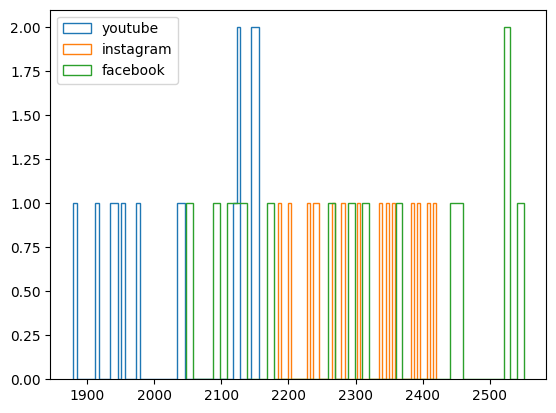

In [ ]:
plt.hist(youtube, histtype = 'step', bins=50);
plt.hist(instagram, histtype = 'step', bins=50);
plt.hist(facebook, histtype = 'step', bins=50);
plt.legend(('youtube', 'instagram', 'facebook'))

Как видно из графика, разница в привлечении клиентов наиболее заметна между платформами youtube и facebook

In [ ]:
#H0 - Средние выборок равны
#H1 - Средние выборок различаются

stat, p = stats.f_oneway(youtube, instagram, facebook)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние выборок равны')
else:
    print('Отклоняем нулевую гипотезу, средние выборок не равны')

Статистика = 21.28190, p = 0.00000
Отклоняем нулевую гипотезу, средние выборок не равны


Результат ANOVA показывает, что, как минимум, среднее по одной из выборок отличается от остальных.

In [ ]:
res_1 = tukey_hsd(youtube, instagram, facebook)
print(res_1)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)   -264.000     0.000  -375.002  -152.998
 (0 - 2)   -251.867     0.000  -362.869  -140.864
 (1 - 0)    264.000     0.000   152.998   375.002
 (1 - 2)     12.133     0.962   -98.869   123.136
 (2 - 0)    251.867     0.000   140.864   362.869
 (2 - 1)    -12.133     0.962  -123.136    98.869



**Вывод:**

Статистически значимая разница в средних имеется между группами 1 (youtube) и 2 (instagram), 1 (youtube) и 3 (facebook).
Вместе с тем существенных различий в средних между группами 2 (instagram) и 3 (facebook) не наблюдается.

# **Примечание:**

Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/). Мы не сможем проверить его или помочь, если вы пришлете:

*   файлы;
*   архивы;
*   скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

**Как правильно задавать вопросы аспирантам, преподавателям и коллегам:**

Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:

1.   Что я делаю?
2.   Какого результата я ожидаю?
3.   Как фактический результат отличается от ожидаемого?
4.   Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.